dimension de X: (100, 2)
dimension de y: (100, 1)


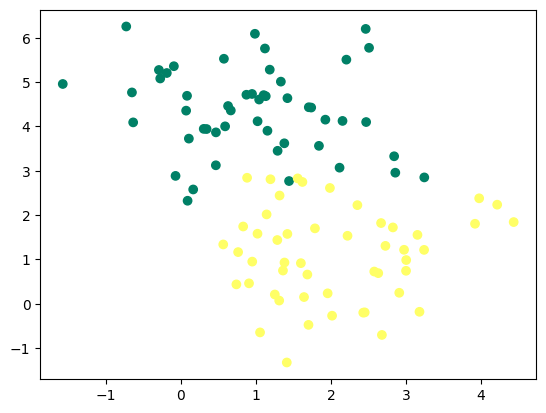

In [37]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))


print("dimension de X:", X.shape)
print("dimension de y:", y.shape)


plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [4]:
def initilisation(X):
   W = np.random.randn(X.shape[1], 1)
   b = np.random.randn(1)
   return (W, b)

In [6]:
def model(X, W, b):
   Z = X.dot(W) + b
   A = 1 / (1 + np.exp(-Z))
   return A

In [9]:
def logLoss(A, y):
   return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1 -A))

In [16]:
def gradient(A, X, y) :
   dW = 1/len(y) * np.dot(X.T, A - y)
   db = 1/len(y) * np.sum( A - y)
   
   return (dW, db)

In [19]:
def update(dW, db, W, b, learningRate): 
   W -= learningRate * dW
   b -= learningRate * db
   return (W, b)

In [43]:
def predict(X, W, b):
   A = model(X, W, b)
   print(A)
   return A >= 0.5

In [27]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [47]:


def artificialNeuron(X, y, learningRate=0.1, nbIter=1000):
   W, b = initilisation(X)
   
   loss = []
   
   for i in tqdm(range(nbIter)):
      A = model(X, W, b)
      loss.append(logLoss(A, y))
      dW, db = gradient(A, X, y)
      W, b = update(dW, db, W, b, learningRate)
      
   
   y_pred = predict(X, W, b)
   print(accuracy_score(y, y_pred))
      
   
   plt.plot(loss)
   plt.show()
   
   return (W, b)

100%|██████████| 10000/10000 [00:00<00:00, 11931.68it/s]


[[9.63116076e-01]
 [9.99437670e-01]
 [7.37964332e-05]
 [6.03763427e-01]
 [9.98083350e-01]
 [4.21786089e-01]
 [4.85675245e-03]
 [9.31394362e-01]
 [5.58350093e-03]
 [9.99812180e-01]
 [1.14282996e-03]
 [9.99297847e-01]
 [8.95347952e-05]
 [1.17186935e-03]
 [9.74774203e-01]
 [9.91652604e-01]
 [9.99985422e-01]
 [5.73546653e-03]
 [9.99426632e-01]
 [9.86262451e-01]
 [7.12349077e-04]
 [1.66194961e-03]
 [6.80952606e-01]
 [5.04373576e-05]
 [9.99483655e-01]
 [5.42654016e-04]
 [9.99888093e-01]
 [4.59217133e-06]
 [9.94075872e-04]
 [8.96254092e-01]
 [9.99978453e-01]
 [8.80740236e-04]
 [9.96933110e-01]
 [9.99978229e-01]
 [4.66608149e-01]
 [9.42991894e-03]
 [9.97803983e-01]
 [6.38635069e-01]
 [2.76030859e-01]
 [9.84987547e-01]
 [1.60874288e-01]
 [3.55432412e-05]
 [8.98215829e-07]
 [3.38271624e-02]
 [2.85404093e-01]
 [9.89120789e-01]
 [9.99978179e-01]
 [9.99987228e-01]
 [1.77366890e-04]
 [2.59160141e-05]
 [9.99866282e-01]
 [9.92696154e-01]
 [7.70384208e-06]
 [2.53667039e-04]
 [6.22648441e-01]
 [6.439227

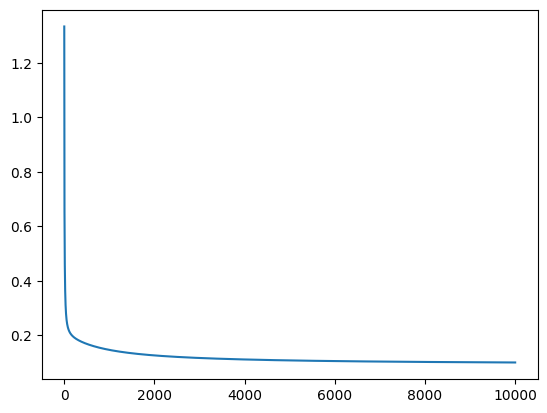

In [51]:
W, b = artificialNeuron(X, y, nbIter=10000)

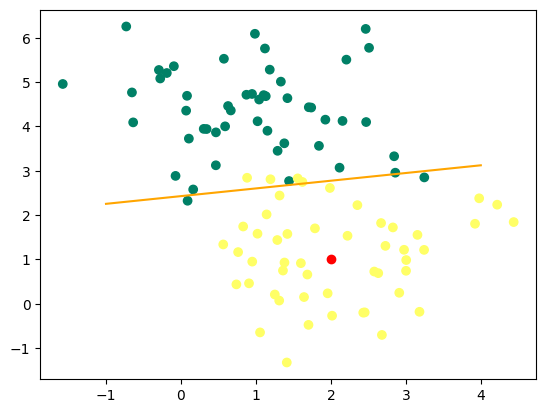

[0.99807265]


array([ True])

In [52]:
newPlant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b ) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(newPlant[0], newPlant[1], c="r")
plt.plot(x0, x1, c='orange')
plt.show()


predict(newPlant, W, b)
